# Problem 1 for the Data Set : Shoesales.csv
 You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs
 of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales
 have been given to you from January 1980 to July 1995.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn as sns
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   IPython.display                 import display

#1.1 Read the data as an appropriate Time Series data and plot the data.

In [183]:
#Read the data
df1 = pd.read_csv("Shoe-Sales.csv")

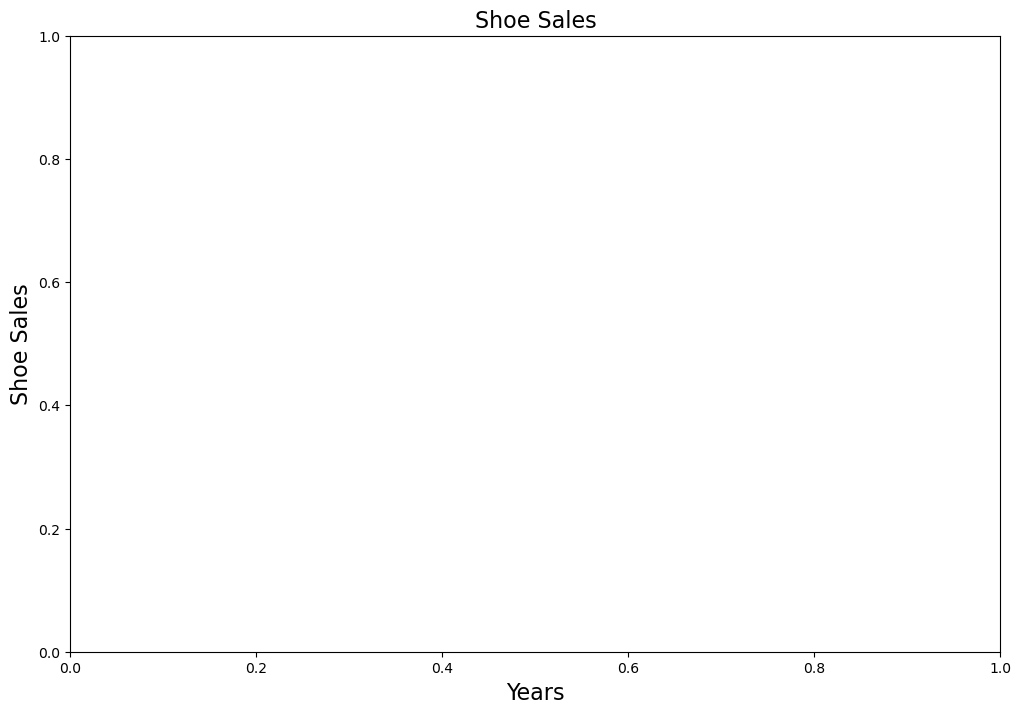

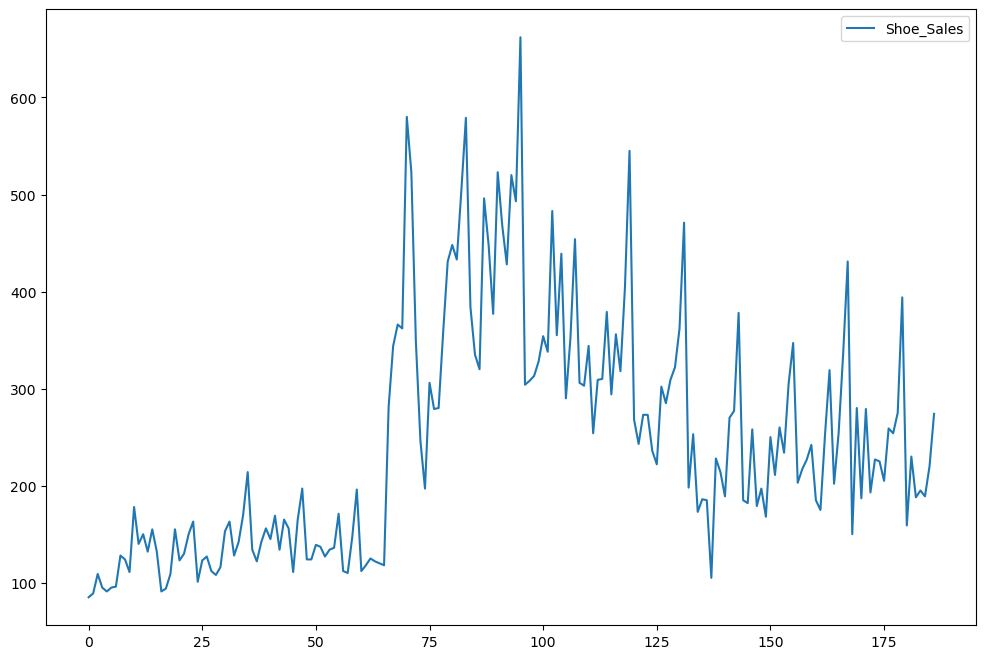

In [184]:
#Plot the time series
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.title(label='Shoe Sales')
df1.plot()
plt.show();

#1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [185]:
df1.shape

(187, 2)

In [186]:
#Check data types
df1.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

Year-Month column is seen as a object datatype so it is changed to datetime datatype

In [187]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df1 = pd.read_csv('Shoe-Sales.csv', parse_dates = ['YearMonth'])

In [188]:
df1.dtypes

YearMonth     datetime64[ns]
Shoe_Sales             int64
dtype: object

Now the time series reference is approprately identified.

In [189]:
#to make our time series reference as the index
df1 = pd.read_csv('Shoe-Sales.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [190]:
df1.head(10)

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91
1980-06-01,95
1980-07-01,96
1980-08-01,128
1980-09-01,124


In [191]:
df1.tail()

,Shoe_Sales
YearMonth,
1995-03-01,188
1995-04-01,195
1995-05-01,189
1995-06-01,220
1995-07-01,274


In [192]:
df1['Year']=df1.index.year
df1['Month']=df1.index.month
df1.head()

,Shoe_Sales,Year,Month
YearMonth,,,
1980-01-01,85,1980,1
1980-02-01,89,1980,2
1980-03-01,109,1980,3
1980-04-01,95,1980,4
1980-05-01,91,1980,5


In [193]:
df1.columns=['Shoe-Sales', 'Year', 'Month']
df1.head()

,Shoe-Sales,Year,Month
YearMonth,,,
1980-01-01,85,1980,1
1980-02-01,89,1980,2
1980-03-01,109,1980,3
1980-04-01,95,1980,4
1980-05-01,91,1980,5


In [194]:
# number of rows and columns
df1.shape

(187, 3)

In [195]:
round(df1.describe().T)

,count,mean,std,min,25%,50%,75%,max
Shoe-Sales,187.0,246.0,121.0,85.0,144.0,220.0,316.0,662.0
Year,187.0,1987.0,5.0,1980.0,1983.0,1987.0,1991.0,1995.0
Month,187.0,6.0,3.0,1.0,3.0,6.0,9.0,12.0


##Univariate

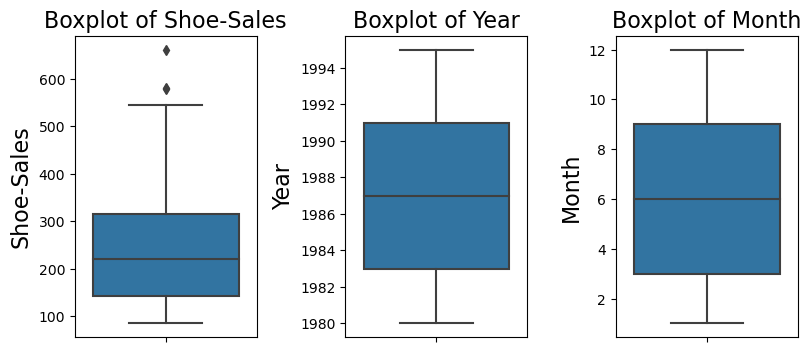

In [196]:
# boxplot

dfbox=df1
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

##Year  Boxplot

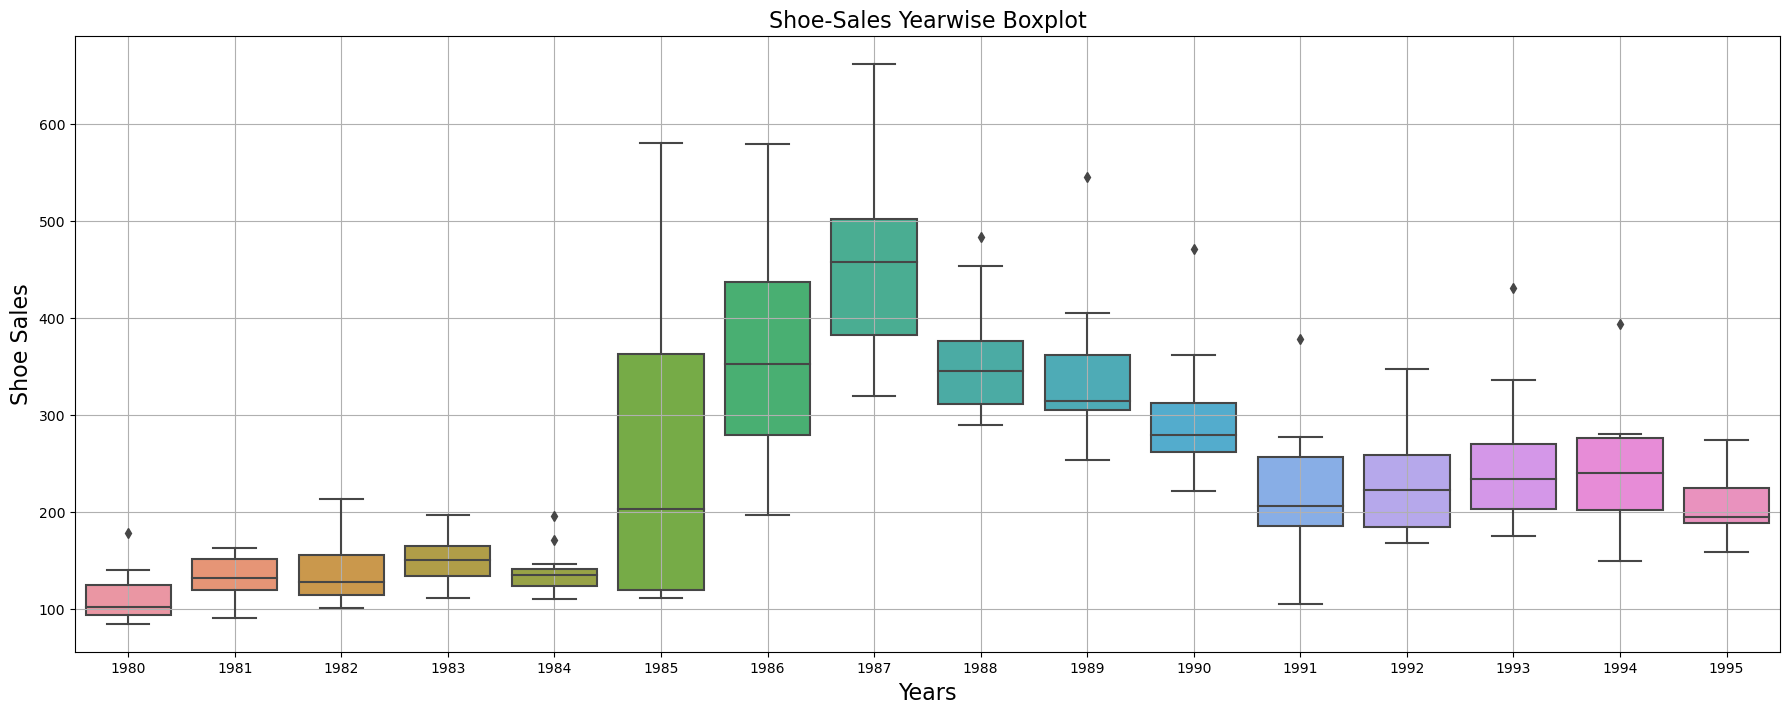

In [197]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.year,y = df1.values[:,0],ax=ax)
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.title(label='Shoe-Sales Yearwise Boxplot')
plt.grid();

##Monthly Boxplot

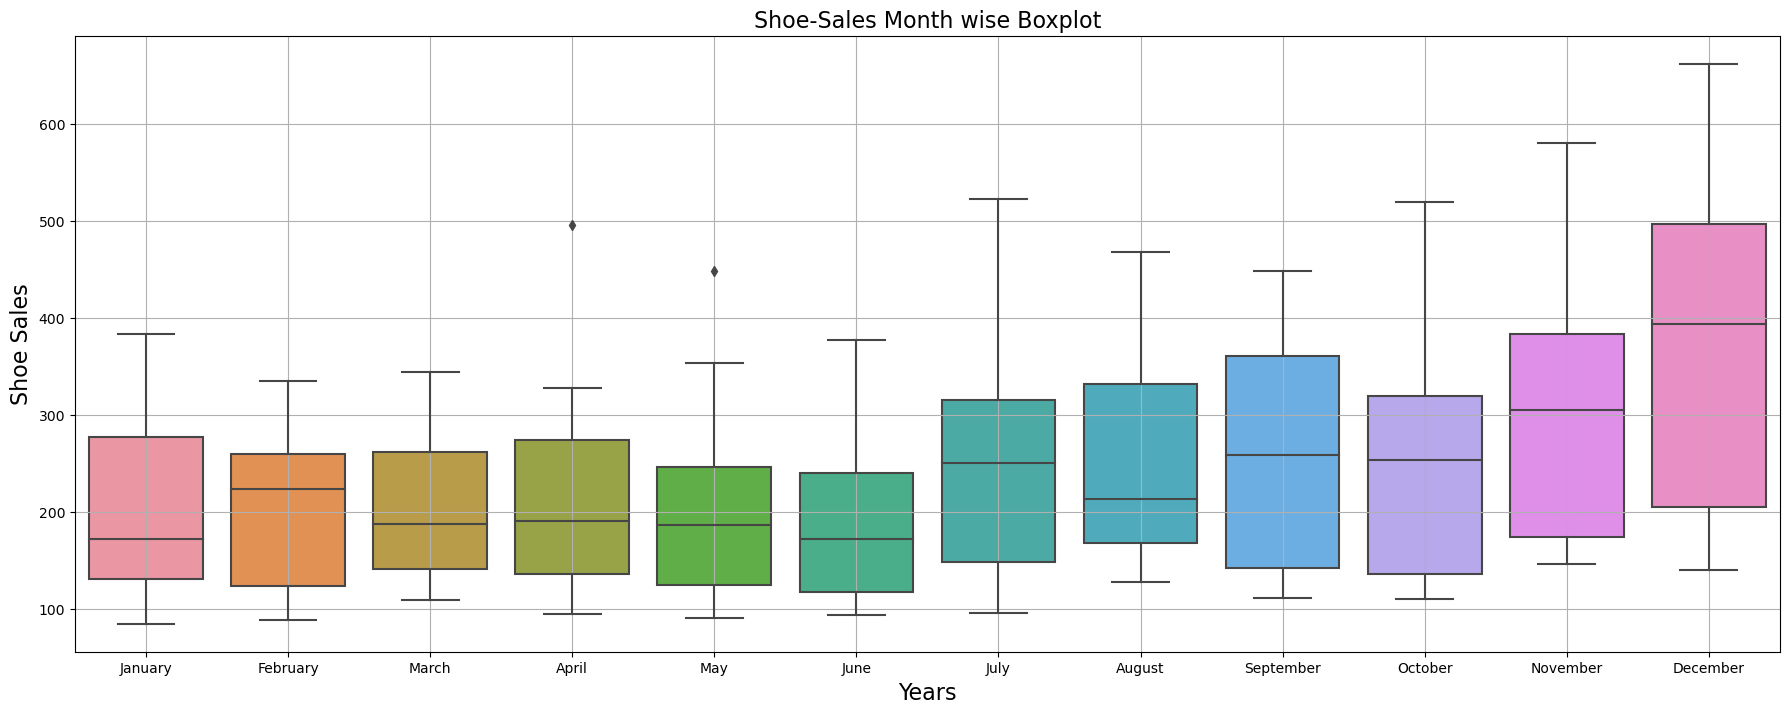

In [198]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month_name(),y = df1.values[:,0],ax=ax)
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.title(label='Shoe-Sales Month wise Boxplot')
plt.grid();

##Graph of monthly sales across years.

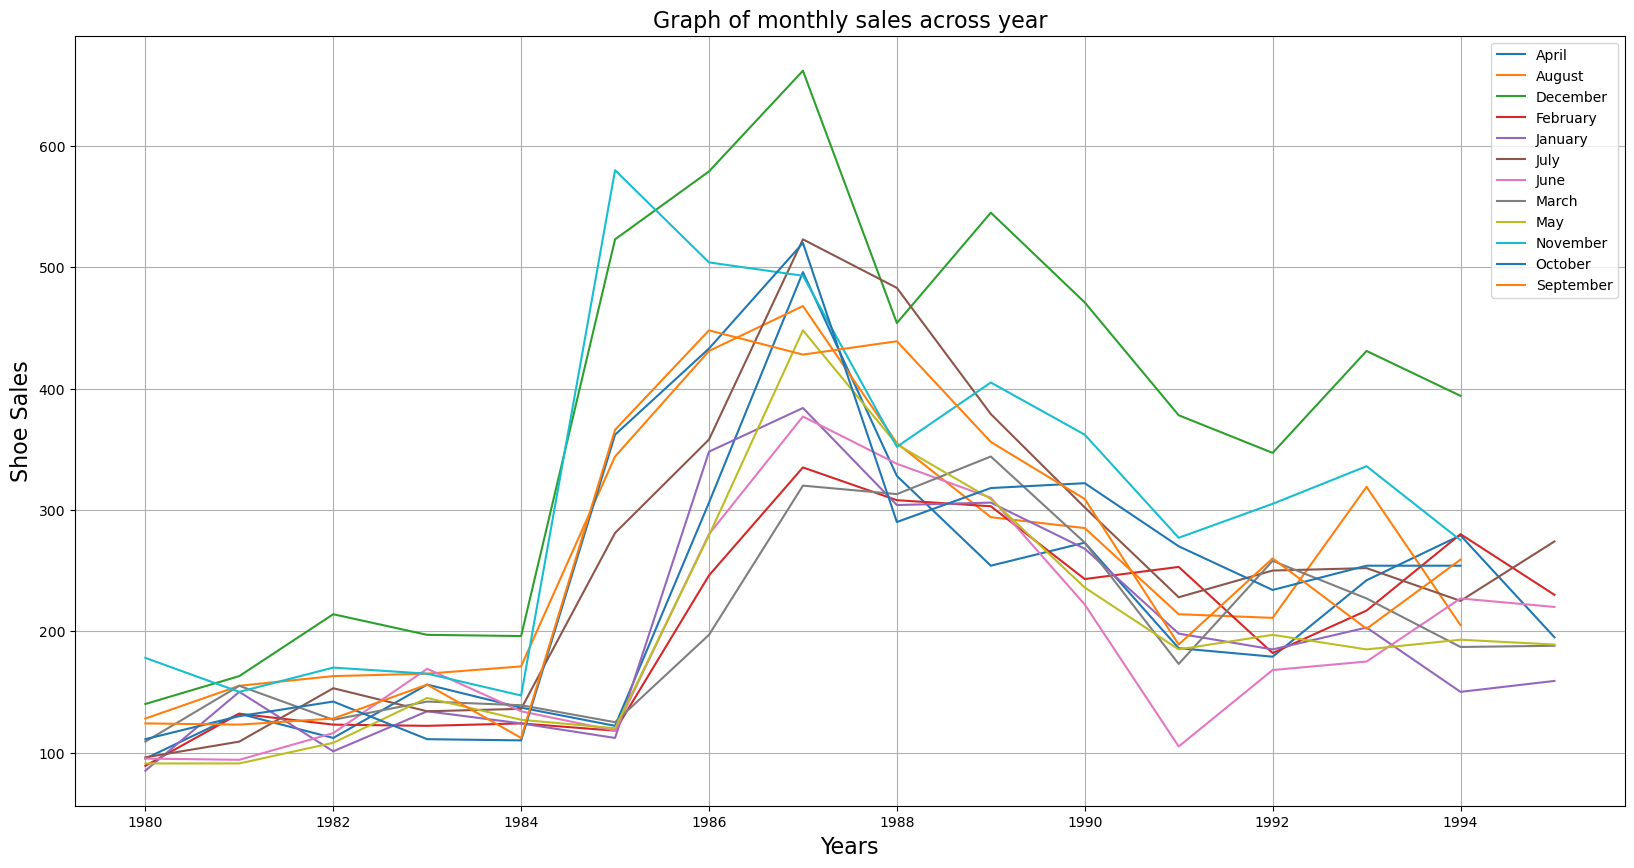

In [199]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Shoe-Sales', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.title(label='Graph of monthly sales across year')
plt.grid()
plt.legend(loc='best');

##Decomposition

In [200]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1['Shoe-Sales'], model = 'additive', period = 12)

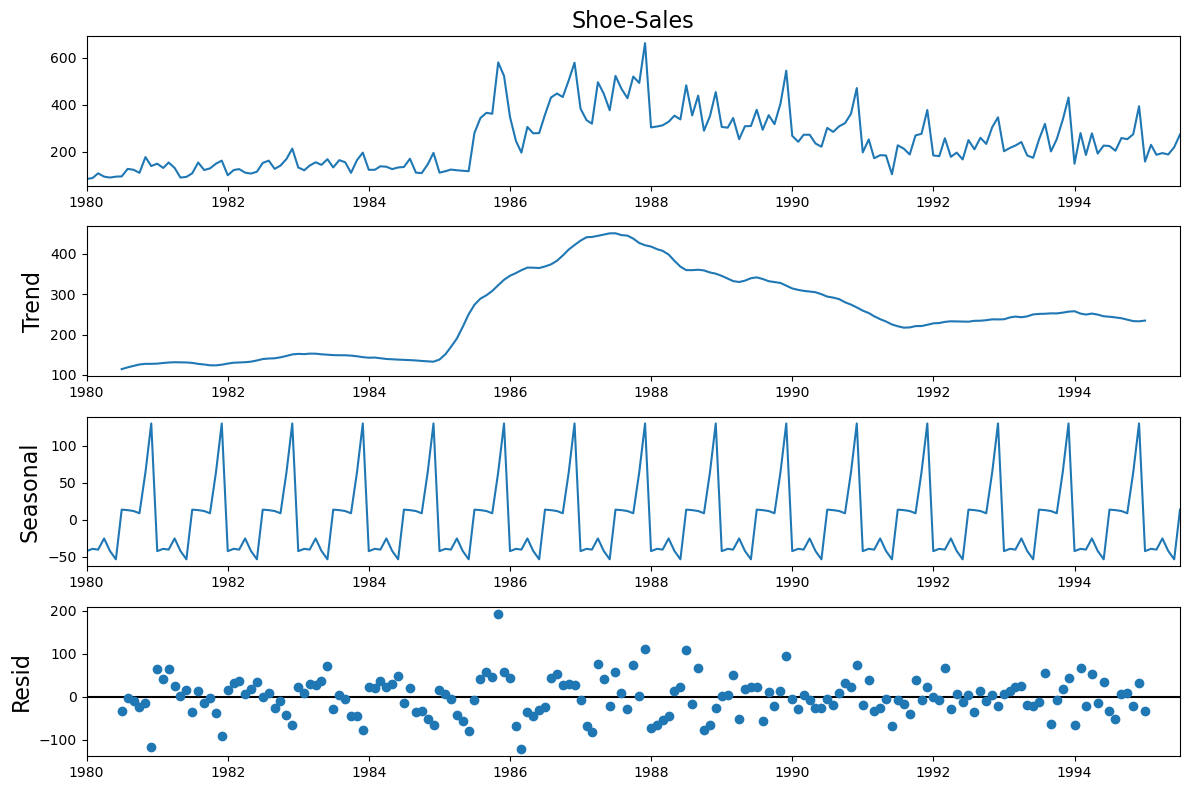

In [201]:
df1_add_decompose.plot()
plt.show()

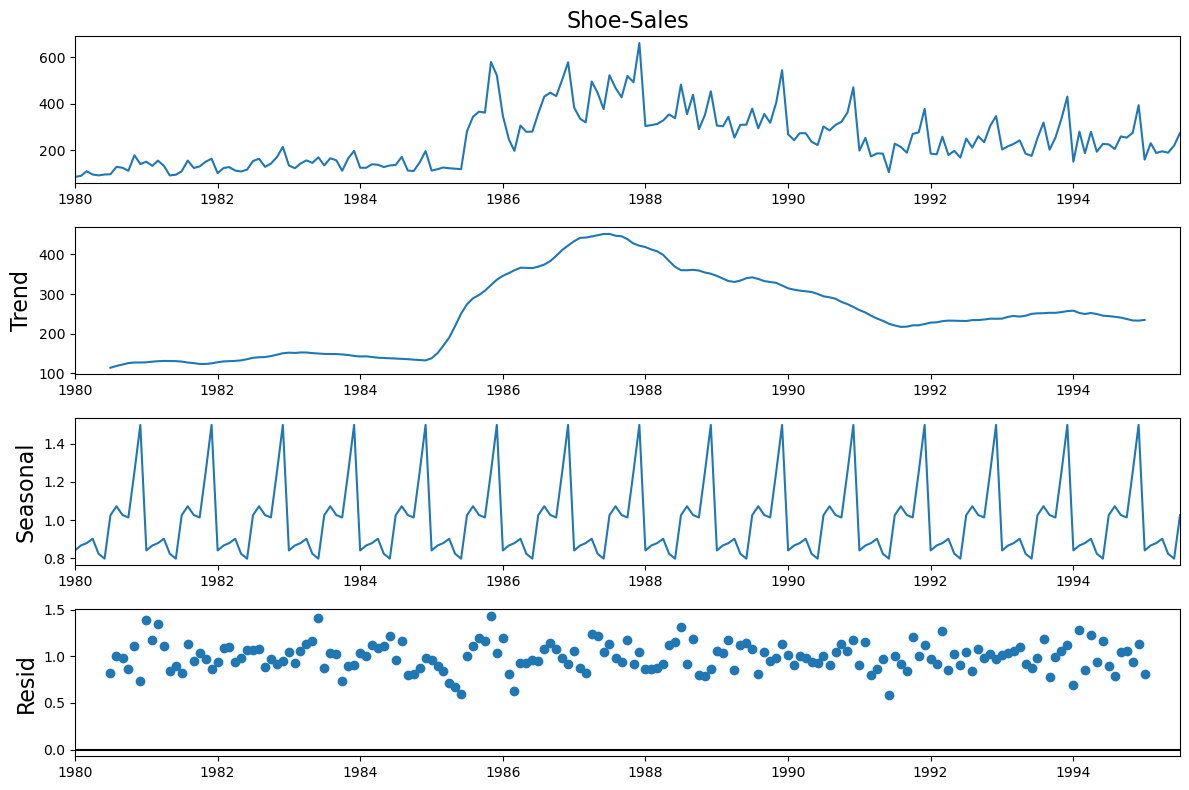

In [202]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1['Shoe-Sales'], model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

Some of the  key observations from this analysis:
1) Trend: 12-months MA is not linear which doesnot shows any trend.

2) Seasonality: seasonality of 12 months is clearly visible

3) Irregular Remainder (random): The multiplicative model works as there are no patterns in the residuals



In [203]:
df1.isnull().sum()

Shoe-Sales    0
Year          0
Month         0
dtype: int64

In [204]:
df1.duplicated().sum()

0

There is no missing values

#1.3)Split the data into training and test. The test data should start in 1991.

Split the data into training and test. The data from 1980-1991 should be training data.The data from 1991-1995 is test data.

In [205]:
train = df1[df1.index < '1991']
test = df1[df1.index >= '1991']

In [206]:
# Printing the Sparkling Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Shoe-Sales,Year,Month
YearMonth,,,
1980-01-01,85,1980,1
1980-02-01,89,1980,2
1980-03-01,109,1980,3
1980-04-01,95,1980,4
1980-05-01,91,1980,5
...,...,...,...
1990-08-01,285,1990,8
1990-09-01,309,1990,9
1990-10-01,322,1990,10


Test Data


,Shoe-Sales,Year,Month
YearMonth,,,
1991-01-01,198,1991,1
1991-02-01,253,1991,2
1991-03-01,173,1991,3
1991-04-01,186,1991,4
1991-05-01,185,1991,5
1991-06-01,105,1991,6
1991-07-01,228,1991,7
1991-08-01,214,1991,8
1991-09-01,189,1991,9


In [207]:
test.shape

(55, 3)

In [208]:
train.shape

(132, 3)

There are 55 rows in test data and 132 rows in train data

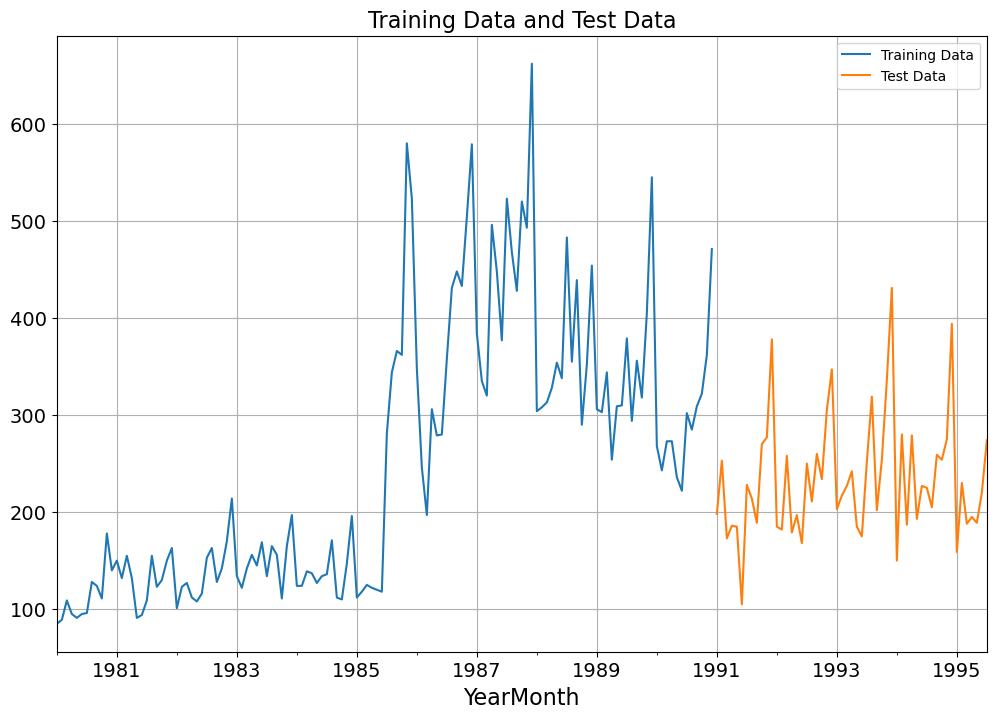

In [209]:
train['Shoe-Sales'].plot(fontsize=14)
test['Shoe-Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Training Data and Test Data")
plt.show()

# 1.4)Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

##Simple Exponential Smoothing

In [210]:
# create class
model_SES = SimpleExpSmoothing(train['Shoe-Sales'],initialization_method='estimated')

In [211]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [212]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.605049221658923,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.83028430097019,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [213]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    420.229857
1991-02-01    420.229857
1991-03-01    420.229857
1991-04-01    420.229857
1991-05-01    420.229857
1991-06-01    420.229857
1991-07-01    420.229857
1991-08-01    420.229857
1991-09-01    420.229857
1991-10-01    420.229857
1991-11-01    420.229857
1991-12-01    420.229857
1992-01-01    420.229857
1992-02-01    420.229857
1992-03-01    420.229857
1992-04-01    420.229857
1992-05-01    420.229857
1992-06-01    420.229857
1992-07-01    420.229857
1992-08-01    420.229857
1992-09-01    420.229857
1992-10-01    420.229857
1992-11-01    420.229857
1992-12-01    420.229857
1993-01-01    420.229857
1993-02-01    420.229857
1993-03-01    420.229857
1993-04-01    420.229857
1993-05-01    420.229857
1993-06-01    420.229857
1993-07-01    420.229857
1993-08-01    420.229857
1993-09-01    420.229857
1993-10-01    420.229857
1993-11-01    420.229857
1993-12-01    420.229857
1994-01-01    420.229857
1994-02-01    420.229857
1994-03-01    420.229857
1994-04-01    420.229857


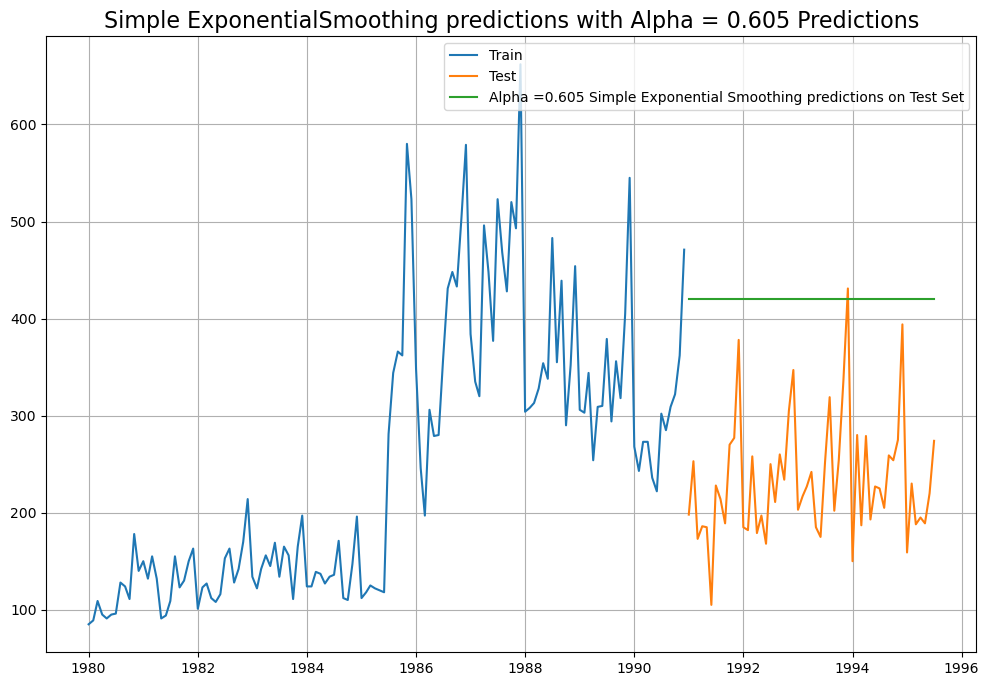

In [214]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Shoe-Sales'], label='Train')
plt.plot(test['Shoe-Sales'], label='Test')

plt.plot(SES_predict, label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple ExponentialSmoothing predictions with Alpha = 0.605 Predictions');

In [215]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [216]:
print('SES RMSE:',mean_squared_error(test['Shoe-Sales'].values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test['Shoe-Sales'].values,SES_predict.values))

SES RMSE: 196.404836419672
SES RMSE (calculated using statsmodels): 196.404836419672


In [217]:
resultsDf1_SES = pd.DataFrame({'RMSE': [em.rmse(test['Shoe-Sales'].values,SES_predict.values)]},index=['Alpha=0.605,SES'])
resultsDf1_SES

,RMSE
"Alpha=0.605,SES",196.404836


##Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.

In [218]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train['Shoe-Sales'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5948061323729839, 'smoothing_trend': 0.000279646480657923, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93815017865691, 'initial_trend': 2.5254544148321547, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [219]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    422.870987
1991-02-01    425.397576
1991-03-01    427.924166
1991-04-01    430.450755
1991-05-01    432.977344
1991-06-01    435.503934
1991-07-01    438.030523
1991-08-01    440.557112
1991-09-01    443.083702
1991-10-01    445.610291
1991-11-01    448.136881
1991-12-01    450.663470
1992-01-01    453.190059
1992-02-01    455.716649
1992-03-01    458.243238
1992-04-01    460.769827
1992-05-01    463.296417
1992-06-01    465.823006
1992-07-01    468.349596
1992-08-01    470.876185
1992-09-01    473.402774
1992-10-01    475.929364
1992-11-01    478.455953
1992-12-01    480.982543
1993-01-01    483.509132
1993-02-01    486.035721
1993-03-01    488.562311
1993-04-01    491.088900
1993-05-01    493.615489
1993-06-01    496.142079
1993-07-01    498.668668
1993-08-01    501.195258
1993-09-01    503.721847
1993-10-01    506.248436
1993-11-01    508.775026
1993-12-01    511.301615
1994-01-01    513.828204
1994-02-01    516.354794
1994-03-01    518.881383
1994-04-01    521.407973


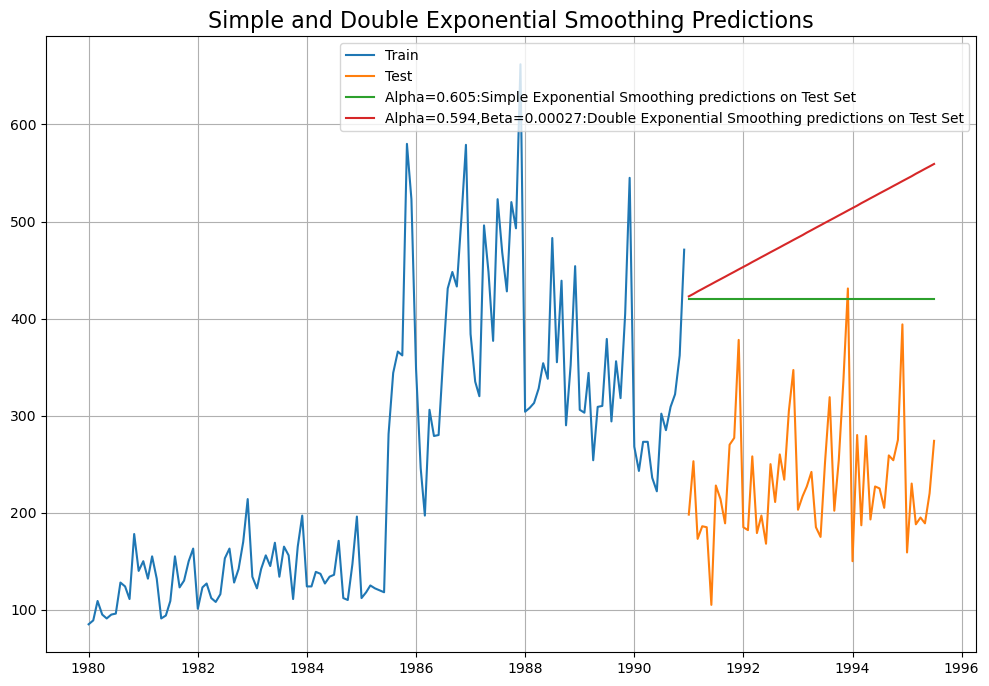

In [220]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Shoe-Sales'], label='Train')
plt.plot(test['Shoe-Sales'], label='Test')

plt.plot(SES_predict, label='Alpha=0.605:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.594,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [221]:
print('DES RMSE:',mean_squared_error(test['Shoe-Sales'].values,DES_predict.values,squared=False))

DES RMSE: 266.16120808183047


In [222]:
resultsDf1_DES = pd.DataFrame({'RMSE': [mean_squared_error(test['Shoe-Sales'].values,DES_predict.values,squared=False)]},index=['Alpha=0.594,Beta=0.00027,DES'])

resultsDf1_temp = pd.concat([resultsDf1_SES, resultsDf1_DES])
resultsDf1_temp

,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208


## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [223]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['Shoe-Sales'],trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999994, 'initial_trend': 1.6939393939394016, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [224]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
1991-06-01    286.532259
1991-07-01    380.493545
1991-08-01    339.555860
1991-09-01    372.342545
1991-10-01    344.012031
1991-11-01    392.660570
1991-12-01    483.619562
1992-01-01    239.374793
1992-02-01    234.107456
1992-03-01    266.949358
1992-04-01    287.551371
1992-05-01    308.010879
1992-06-01    306.823393
1992-07-01    400.784679
1992-08-01    359.846995
1992-09-01    392.633680
1992-10-01    364.303165
1992-11-01    412.951705
1992-12-01    503.910697
1993-01-01    259.665928
1993-02-01    254.398590
1993-03-01    287.240493
1993-04-01    307.842506
1993-05-01    328.302014
1993-06-01    327.114528
1993-07-01    421.075814
1993-08-01    380.138129
1993-09-01    412.924815
1993-10-01    384.594300
1993-11-01    433.242840
1993-12-01    524.201832
1994-01-01    279.957063
1994-02-01    274.689725
1994-03-01    307.531628
1994-04-01    328.133640


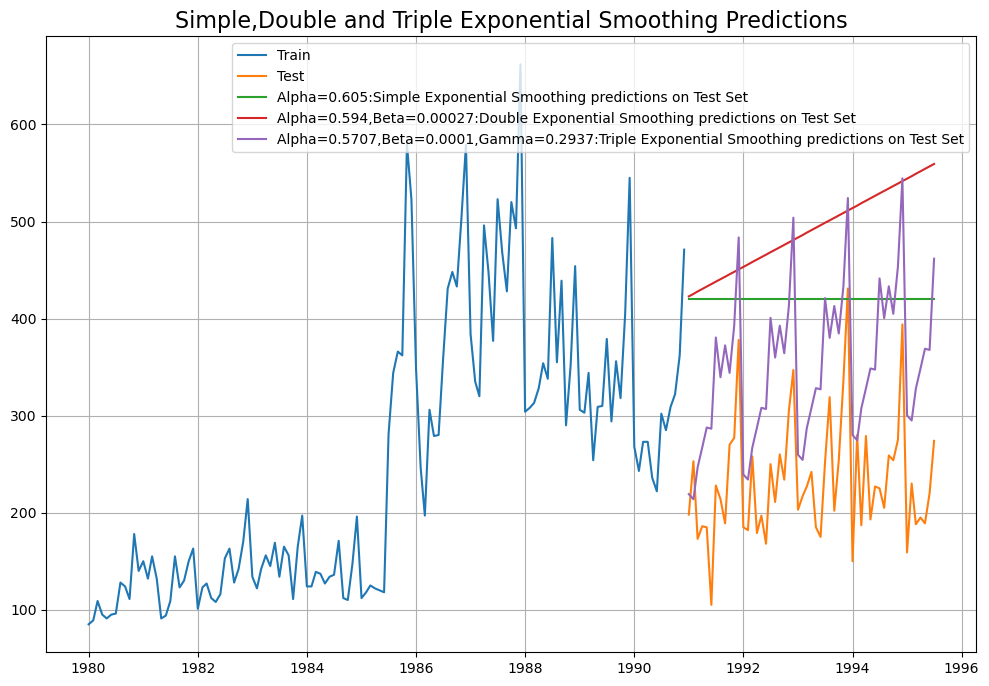

In [225]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Shoe-Sales'], label='Train')
plt.plot(test['Shoe-Sales'], label='Test')

plt.plot(SES_predict, label='Alpha=0.605:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.594,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.5707,Beta=0.0001,Gamma=0.2937:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [226]:
print('TES RMSE:',mean_squared_error(test['Shoe-Sales'].values,TES_predict.values,squared=False))

TES RMSE: 128.99252592312354


In [227]:
resultsDf1_TES = pd.DataFrame({'RMSE': [mean_squared_error(test['Shoe-Sales'].values,TES_predict.values,squared=False)]},index=['Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)'])

resultsDf1_temp = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES])
resultsDf1_temp

,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208
"Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)",128.992526


Inference
Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

## Holt-Winters - ETS(A, M, M) - Holt Winter's linear method with multiplicative error and seasonal

In [228]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train['Shoe-Sales'],trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the mhttp://localhost:8888/notebooks/Downloads/TSF%20Shoe%20sales%20Arpita%20Bayen%20G-4%20DSBA%20Nov%20A.ipynb#Holt-Winters---ETS(A,-M,-M)---Holt-Winter's-linear-method-with-multiplicative-error-and-seasonalodel
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5711286329525818, 'smoothing_trend': 0.00014781930867568429, 'smoothing_seasonal': 0.20294733706077994, 'damping_trend': nan, 'initial_level': 116.35529208070726, 'initial_trend': 0.11219854465675648, 'initial_seasons': array([1.05679343, 1.01130311, 1.2337466 , 1.40663129, 1.32162715,
       1.07936886, 1.18018187, 1.50183082, 1.72369093, 1.4704132 ,
       1.75485304, 1.92101444]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [229]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test['Shoe-Sales']))
TES_predict_am

1991-01-01    261.342543
1991-02-01    243.085370
1991-03-01    256.996702
1991-04-01    270.198135
1991-05-01    267.375606
1991-06-01    256.946321
1991-07-01    339.585163
1991-08-01    315.726553
1991-09-01    340.179286
1991-10-01    314.977543
1991-11-01    376.103895
1991-12-01    466.476288
1992-01-01    263.151144
1992-02-01    244.766655
1992-03-01    258.773180
1992-04-01    272.064791
1992-05-01    269.221701
1992-06-01    258.719386
1992-07-01    341.927133
1992-08-01    317.902729
1992-09-01    342.522659
1992-10-01    317.146066
1992-11-01    378.691770
1992-12-01    469.684153
1993-01-01    264.959745
1993-02-01    246.447939
1993-03-01    260.549657
1993-04-01    273.931448
1993-05-01    271.067795
1993-06-01    260.492451
1993-07-01    344.269103
1993-08-01    320.078906
1993-09-01    344.866033
1993-10-01    319.314589
1993-11-01    381.279644
1993-12-01    472.892017
1994-01-01    266.768347
1994-02-01    248.129224
1994-03-01    262.326135
1994-04-01    275.798104


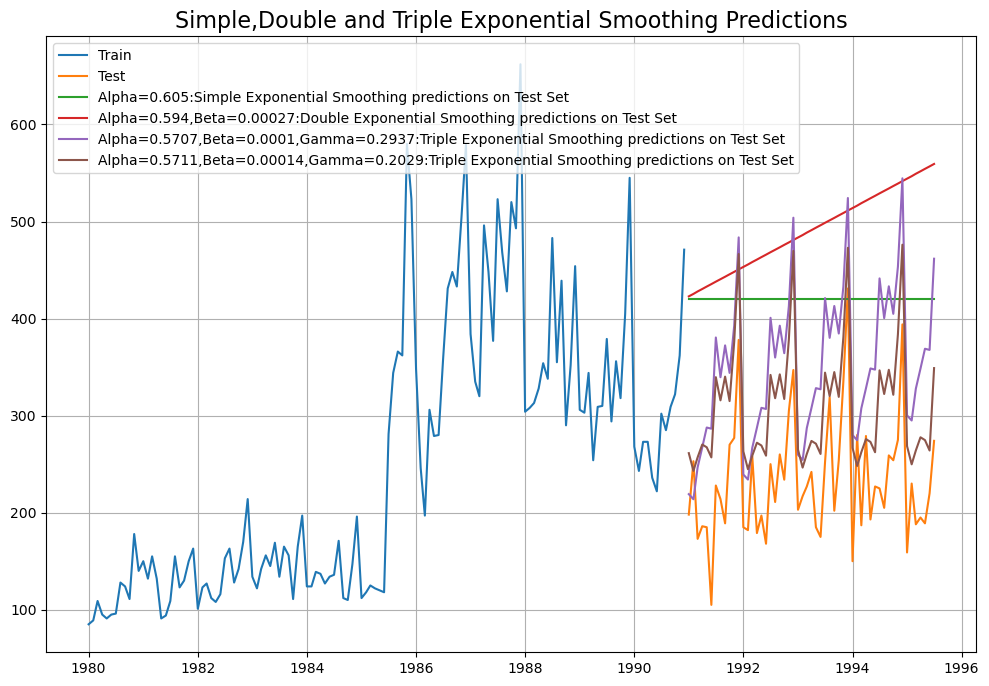

In [230]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Shoe-Sales'], label='Train')
plt.plot(test['Shoe-Sales'], label='Test')

plt.plot(SES_predict, label='Alpha=0.605:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.594,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.5707,Beta=0.0001,Gamma=0.2937:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.5711,Beta=0.00014,Gamma=0.2029:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

###Report model accuracy

In [231]:
print('TES_am RMSE:',mean_squared_error(test['Shoe-Sales'].values,TES_predict_am.values,squared=False))

TES_am RMSE: 83.734048494837


In [232]:
resultsDf1_TESm = pd.DataFrame({'RMSE': [mean_squared_error(test['Shoe-Sales'].values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.5711,Beta=0.00014,Gamma=0.2029:TES(multiplicative error)'])

resultsDf1_temp = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES,resultsDf1_TESm])
resultsDf1_temp


,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208
"Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)",128.992526
"Alpha=0.5711,Beta=0.00014,Gamma=0.2029:TES(multiplicative error)",83.734048


###  Linear Regression

For this particular linear regression, we are going to regress the 'Shoe Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [233]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [234]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [235]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Shoe-Sales,Year,Month,time
YearMonth,,,,
1980-01-01,85,1980,1,1
1980-02-01,89,1980,2,2
1980-03-01,109,1980,3,3
1980-04-01,95,1980,4,4
1980-05-01,91,1980,5,5


Last few rows of Training Data


,Shoe-Sales,Year,Month,time
YearMonth,,,,
1990-08-01,285,1990,8,128
1990-09-01,309,1990,9,129
1990-10-01,322,1990,10,130
1990-11-01,362,1990,11,131
1990-12-01,471,1990,12,132


First few rows of Test Data


,Shoe-Sales,Year,Month,time
YearMonth,,,,
1991-01-01,198,1991,1,133
1991-02-01,253,1991,2,134
1991-03-01,173,1991,3,135
1991-04-01,186,1991,4,136
1991-05-01,185,1991,5,137


Last few rows of Test Data


,Shoe-Sales,Year,Month,time
YearMonth,,,,
1995-03-01,188,1995,3,183
1995-04-01,195,1995,4,184
1995-05-01,189,1995,5,185
1995-06-01,220,1995,6,186
1995-07-01,274,1995,7,187


Now that our training and test data has been modified, let us go ahead use LinearRegression−−−−−−−−−−−−−−−
 to build the model on the training data and test the model on the test data.

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
lr = LinearRegression()

In [238]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe-Sales'])

LinearRegression()

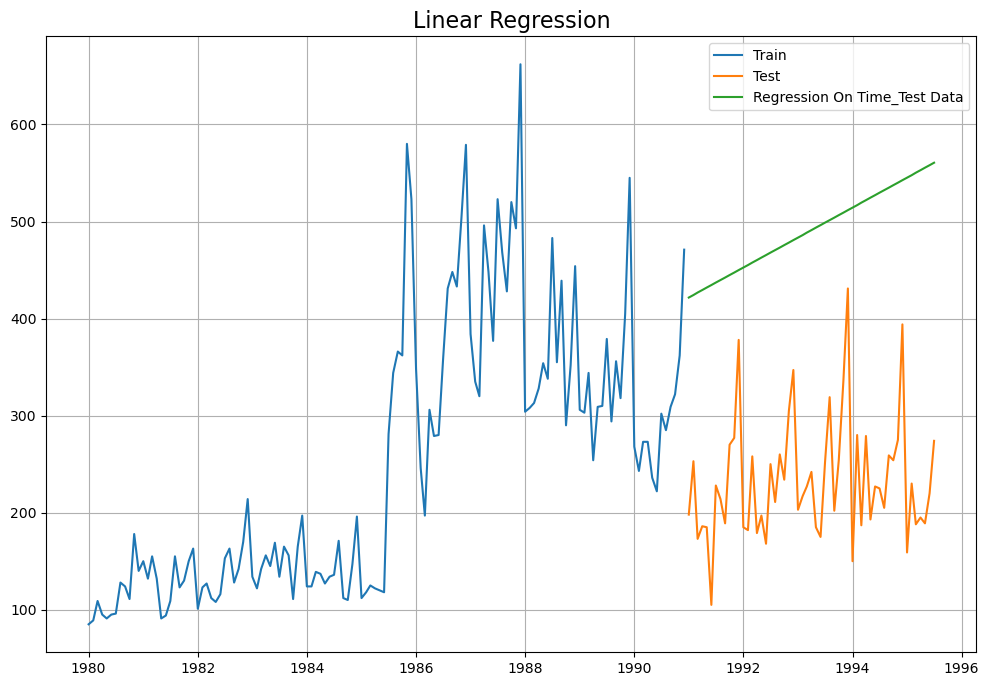

In [239]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Shoe-Sales'], label='Train')
plt.plot(test['Shoe-Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression')
plt.legend(loc='best')
plt.grid();

In [240]:
from sklearn import metrics

In [241]:
rmse_model1_test = metrics.mean_squared_error(test['Shoe-Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276 


In [242]:
resultsDf_LR = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf_LR

,RMSE
RegressionOnTime,266.276472


### Naive Approach: y^t+1=yt


For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [243]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [244]:
train.tail()

,Shoe-Sales,Year,Month
YearMonth,,,
1990-08-01,285,1990,8
1990-09-01,309,1990,9
1990-10-01,322,1990,10
1990-11-01,362,1990,11
1990-12-01,471,1990,12


In [245]:
NaiveModel_test['naive'] = np.asarray(train['Shoe-Sales'])[len(np.asarray(train['Shoe-Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

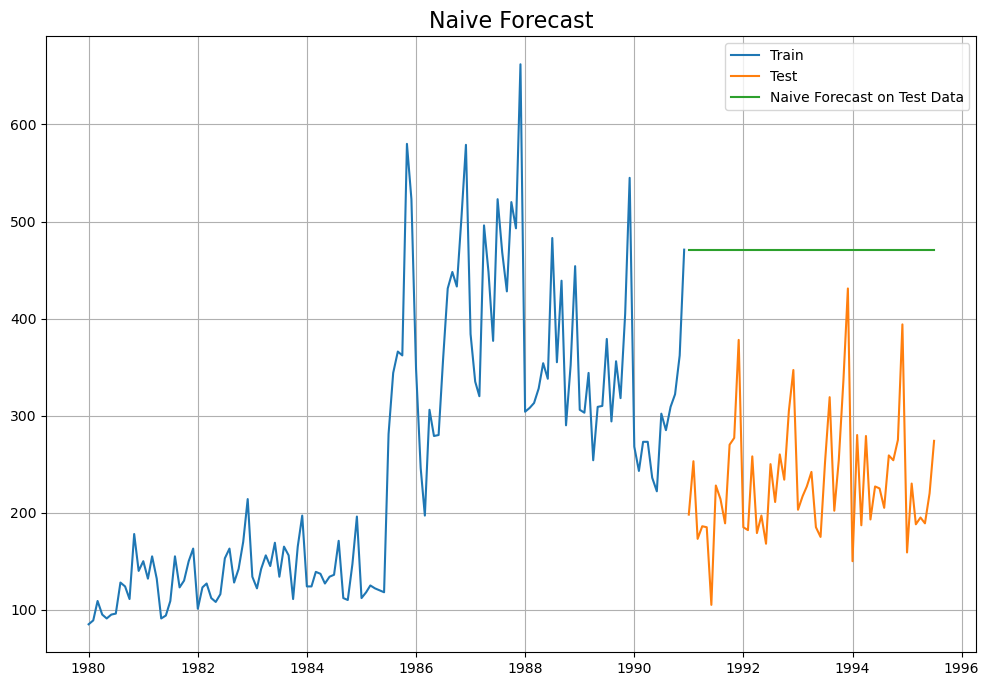

In [246]:
plt.plot(NaiveModel_train['Shoe-Sales'], label='Train')
plt.plot(test['Shoe-Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [247]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe-Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 245.121


In [248]:
resultsDf_NM = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_NM])
resultsDf

,RMSE
RegressionOnTime,266.276472
Naive Model,245.121306


### Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [249]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [250]:
SimpleAverage_test['mean_forecast'] = train['Shoe-Sales'].mean()
SimpleAverage_test.head()

,Shoe-Sales,Year,Month,mean_forecast
YearMonth,,,,
1991-01-01,198,1991,1,250.575758
1991-02-01,253,1991,2,250.575758
1991-03-01,173,1991,3,250.575758
1991-04-01,186,1991,4,250.575758
1991-05-01,185,1991,5,250.575758


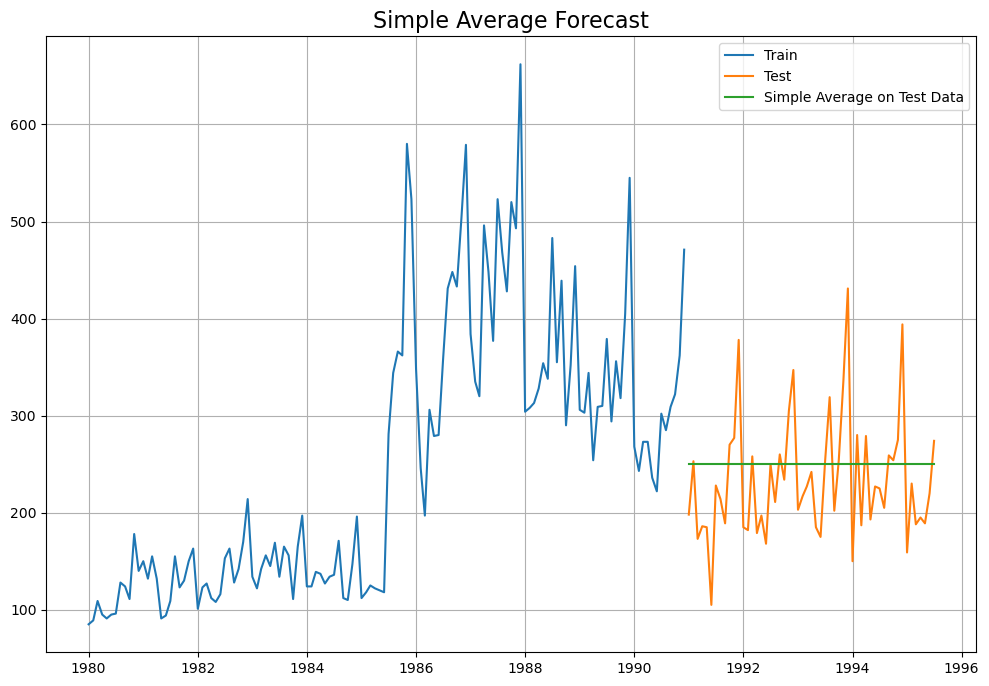

In [251]:
plt.plot(SimpleAverage_train['Shoe-Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe-Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [252]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe-Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 63.985


In [253]:
resultsDf_SA = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES,resultsDf1_TESm,resultsDf_LR, resultsDf_NM, resultsDf_SA])
resultsDf

,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208
"Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)",128.992526
"Alpha=0.5711,Beta=0.00014,Gamma=0.2029:TES(multiplicative error)",83.734048
RegressionOnTime,266.276472
Naive Model,245.121306
SimpleAverageModel,63.984570


#1.5)Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

Check for stationarity of the whole Time Series data at α
 =0.05

In [254]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df1['Shoe-Sales'])#Stationarity check on train time series data
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.717
DF test p-value is 0.4222


The Data is non Stationary

In [255]:
#Let's try to do log transformation
df1_log = df1.copy()

In [256]:
df1_log['Shoe-Sales'] = np.log(df1['Shoe-Sales'])

In [257]:
df1_log

,Shoe-Sales,Year,Month
YearMonth,,,
1980-01-01,4.442651,1980,1
1980-02-01,4.488636,1980,2
1980-03-01,4.691348,1980,3
1980-04-01,4.553877,1980,4
1980-05-01,4.510860,1980,5
...,...,...,...
1995-03-01,5.236442,1995,3
1995-04-01,5.273000,1995,4
1995-05-01,5.241747,1995,5


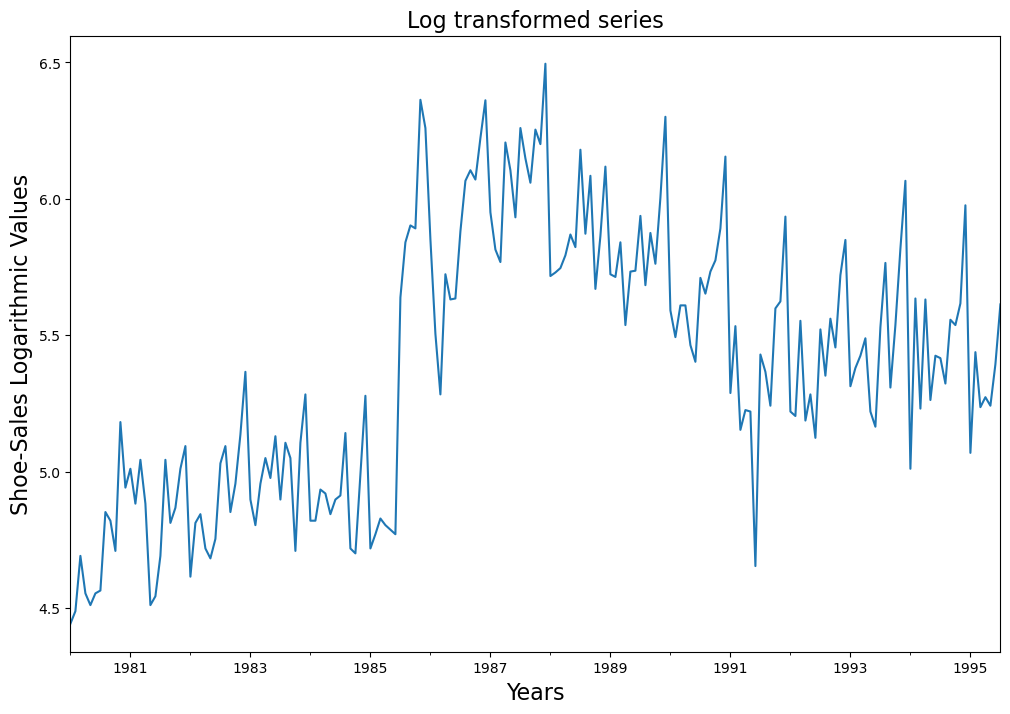

In [258]:
#Visualize the log transformed series
df1_log['Shoe-Sales'].plot()
plt.xlabel('Years')
plt.ylabel('Shoe-Sales Logarithmic Values')
plt.title(label='Log transformed series')
plt.show()

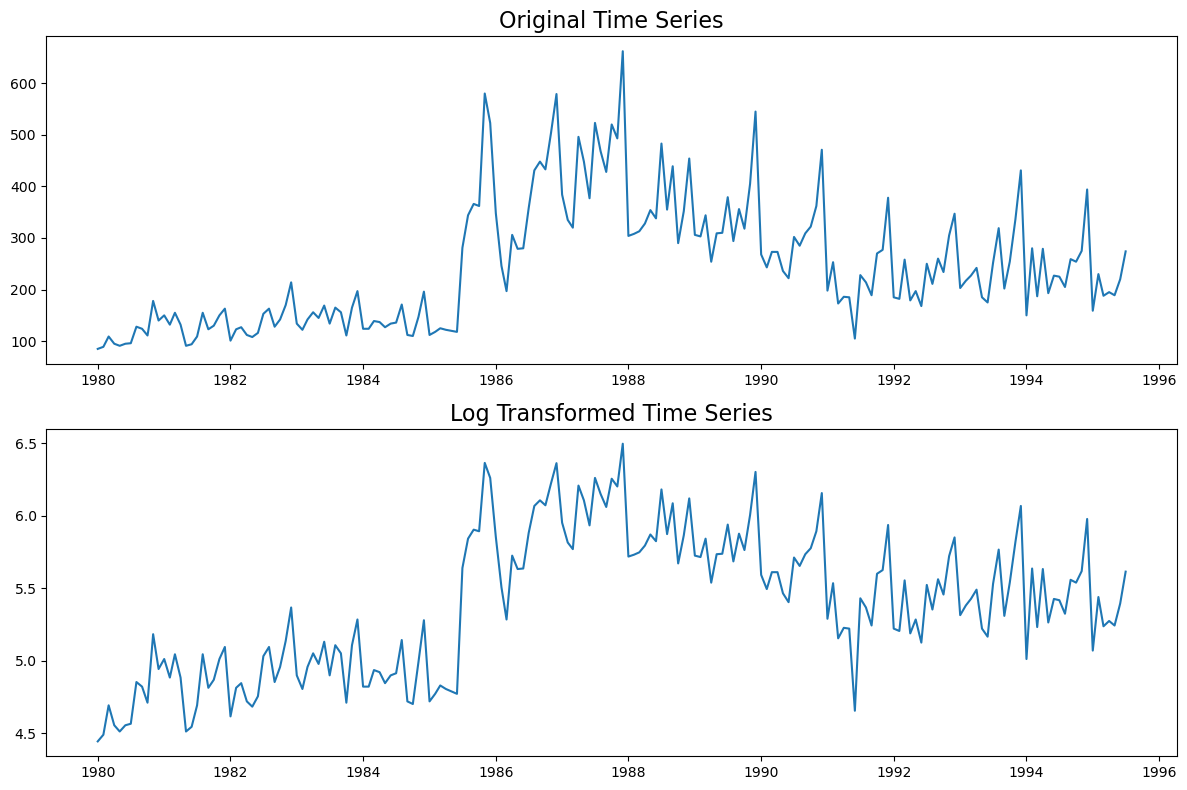

In [259]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1['Shoe-Sales'])

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log['Shoe-Sales'])
plt.tight_layout()

In [260]:
dftest = adfuller(df1_log['Shoe-Sales'])#Stationarity check on train time series data
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.648
DF test p-value is 0.4582


After checking for logaritmic the data is stationary

#1.6)Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#Auto Regressive(AR) Models

Autoregression means regression of a variable on itself which means Autoregressive models use previous time period values to predict the current time period values.
One of the fundamental assumptions of an AR model is that the time series is assumed to be a stationary process.
An AR(p) model (Auto-Regressive model of order p) can be written as:


yt  =  φ1yt−1+φ2yt−2+……+φpyt−p+εt
εt  is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ
The φ are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.


## Choose the order 'p' of AR model

- We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.


- For an AR model, 2 ways to identify order of 'p':


<i>1) **PACF Approach** :  the PACF method where the  (Partial Auto Correlation Function) values cut off and become zero after a certain lag.               PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken             as the order of AR as ‘p’. This can be seen from a PACF plot.</i>

- <i>If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.</i>
- <i>If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…</i>



 - **Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between $𝑋_{𝑡}$ and $𝑋_{𝑡−2}$ holding $𝑋_{𝑡−1}$ fixed.**


<font color='blue'><i>2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.** </i></font>

Choose the order 'p' of AR model
We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.
For an AR model, 2 ways to identify order of 'p':
1) PACF Approach : the PACF method where the (Partial Auto Correlation Function) values cut off and become zero after a certain lag. PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken as the order of AR as ‘p’. This can be seen from a PACF plot.

If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.
If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…
Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between  Xt  and  Xt−2  holding  Xt−1  fixed.
2) Lowest AIC Approach : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.



#### Using the 2nd method(Lowest AIC) to compare different orders of 'p'

In [261]:

# Define the p parameter to take any value between 0 and 2
p= range(1,4)

## Moving Average(MA) Models

## <font color='blue'>$y_{t} =  ε_{t} + θ_{1}ε_{t-1} +……+ θ_{q}ε_{t-q}$</font>

- **Where $y_{t}$  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance $σ^{2}$ and  $Cov(ε_{t-1},ε_{t-q})$ = 0.**

## Choose the order 'q' of MA model

- We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.


- For a MA model,  

<i>1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.</i>



<i>2) <font color='blue'>**Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. </i></font>


Choose the order 'q' of MA model
We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.
For a MA model,
1) ACF Approach : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.

2) Lowest AIC Approach : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered.




#### Using the 2nd method(Lowest AIC) to compare different orders of 'q'

In [262]:

# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

### WHY?

- <font color='blue'>**ACF(0)=1**</font>


- <font color='blue'>**ACF(1)=PACF(1)**</font>

Parameter (p, d, q) estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models

In [263]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [264]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [265]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [266]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [267]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [268]:

train_sales_ts_log = np.log10(train['Shoe-Sales'])
#Log transformation on the training data to make the time series stationary as we did with full data

In [269]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

AR Model


Autoregressive models use previous time period values to predict the current time period values.

#### <u>AR Model building to estimate best 'p' ( Lowest AIC Approach )</u>

In [270]:

# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [271]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:-213.21706557349398
ARIMA(2, 0, 0) - AIC:-214.86174853648737
ARIMA(3, 0, 0) - AIC:-219.47936274818386


Building AR model with best 'p' parameter

In [272]:
best_model = ARIMA(train_sales_ts_log,order = (1,0,0))#p=2 with lowest AIC
best_results = best_model.fit()

In [273]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Shoe-Sales   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 109.609
Date:                Thu, 30 Nov 2023   AIC                           -213.217
Time:                        20:20:23   BIC                           -204.569
Sample:                    01-01-1980   HQIC                          -209.703
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3286      0.086     27.006      0.000       2.160       2.498
ar.L1          0.9097      0.037     24.880      0.000       0.838       0.981
sigma2         0.0110      0.001      8.837      0.0

#### <u>Calculating RMSE for best AR model </u>

In [274]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [275]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.05)#forecasting values

In [276]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [277]:
# Compute the root mean square error
mse1= ((testCopy1['Shoe-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse1 = np.sqrt(mse1)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse1, 3)))

The Root Mean Squared Error of our forecasts is 92.14


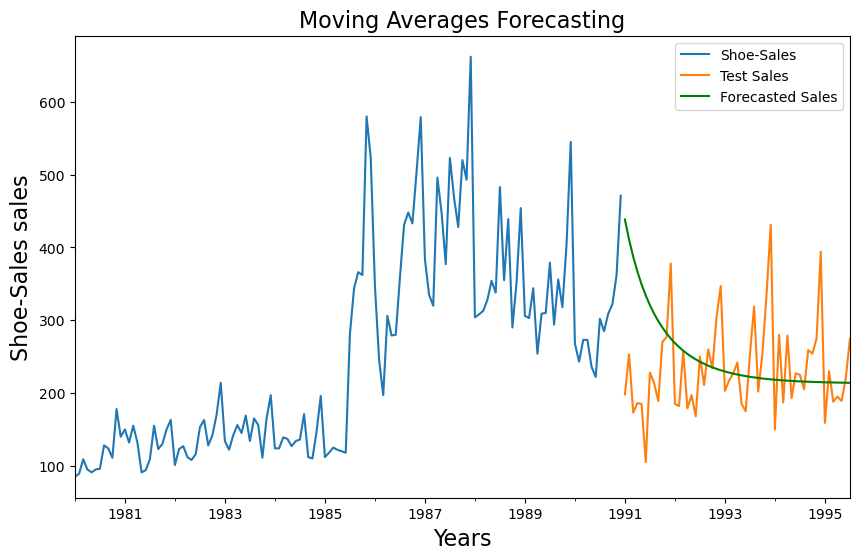

In [278]:
axis = train['Shoe-Sales'].plot(label='Shoe-Sales', figsize=(10, 6))
testCopy1['Shoe-Sales'].plot(ax=axis, label='Test Sales')
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', color='g')
axis.set_xlabel('Years')
axis.set_ylabel('Shoe-Sales sales')
plt.legend(loc='best')
plt.title('Moving Averages Forecasting')
plt.show()
plt.close()

In [279]:
resultsDf_AR = pd.DataFrame({'RMSE': rmse1}
                           ,index=['Best MA Model : AR(1,0,0)'])

resultsDf = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES,resultsDf1_TESm,resultsDf_LR, resultsDf_NM, resultsDf_SA,resultsDf_AR])
resultsDf

,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208
"Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)",128.992526
"Alpha=0.5711,Beta=0.00014,Gamma=0.2029:TES(multiplicative error)",83.734048
RegressionOnTime,266.276472
Naive Model,245.121306
SimpleAverageModel,63.984570
"Best MA Model : AR(1,0,0)",92.140047


## ARMA Model

- **Improving AutoRegressive Models through Moving Average Forecasts.**
- ARMA models consist of 2 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARMA Model building to estimate best <font color='blue'>'p' , 'q' </font> ( Lowest AIC Approach )</u>

In [280]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [281]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-217.78035415098938
ARIMA(1, 0, 2) - AIC:-219.67667310438102
ARIMA(1, 0, 3) - AIC:-217.72889968230874
ARIMA(2, 0, 1) - AIC:-219.63430487237434
ARIMA(2, 0, 2) - AIC:-217.81183172700628
ARIMA(2, 0, 3) - AIC:-215.72076266649165
ARIMA(3, 0, 1) - AIC:-218.04532897445313
ARIMA(3, 0, 2) - AIC:-212.85799190979367
ARIMA(3, 0, 3) - AIC:-216.63132417426624


In [282]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
1,"(1, 0, 2)",-219.676673
3,"(2, 0, 1)",-219.634305
6,"(3, 0, 1)",-218.045329
4,"(2, 0, 2)",-217.811832
0,"(1, 0, 1)",-217.780354


Building ARMA model with best p,q parameter

In [283]:
best_model = ARIMA(train_sales_ts_log,order = (1,0,2))
best_results = best_model.fit()

In [284]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:             Shoe-Sales   No. Observations:                  132
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 114.838
Date:                Thu, 30 Nov 2023   AIC                           -219.677
Time:                        20:20:34   BIC                           -205.263
Sample:                    01-01-1980   HQIC                          -213.819
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3101      0.149     15.504      0.000       2.018       2.602
ar.L1          0.9783      0.022     44.433      0.000       0.935       1.021
ma.L1         -0.2786      0.088     -3.173      0.0

#### <u>Calculating RMSE for best MA model </u>

In [285]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [286]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.05)#forecasting values

In [287]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [288]:
# Compute the root mean square error
mse2 = ((testCopy1['Shoe-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse2 = np.sqrt(mse2)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse2, 3)))

The Root Mean Squared Error of our forecasts is 100.861


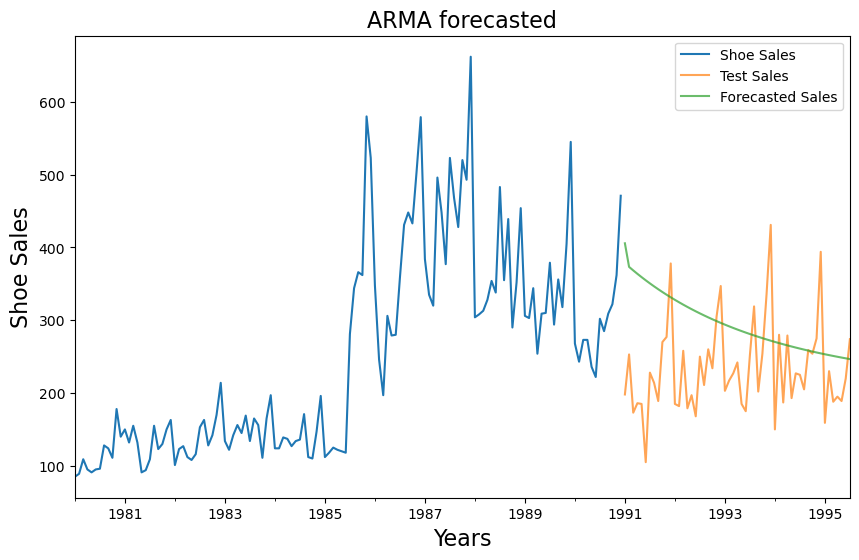

In [289]:
axis = train['Shoe-Sales'].plot(label='Shoe Sales', figsize=(10, 6))
testCopy1['Shoe-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Shoe Sales')
plt.legend(loc='best')
plt.title('ARMA forecasted')
plt.show()
plt.close()

In [290]:
resultsDf_ARMA = pd.DataFrame({'RMSE': rmse2}
                           ,index=['Best ARMA Model : ARMA(1,0,2)'])

resultsDf = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES,resultsDf1_TESm,resultsDf_LR, resultsDf_NM, resultsDf_SA,resultsDf_AR,resultsDf_ARMA])
resultsDf

,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208
"Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)",128.992526
"Alpha=0.5711,Beta=0.00014,Gamma=0.2029:TES(multiplicative error)",83.734048
RegressionOnTime,266.276472
Naive Model,245.121306
SimpleAverageModel,63.984570
"Best MA Model : AR(1,0,0)",92.140047
"Best ARMA Model : ARMA(1,0,2)",100.861370


## Building an automated version of the ARIMA

### Automated ARIMA model

In [291]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p =  range(0, 3)
q = range(0, 2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (2, 1, 0)
Model: (2, 1, 1)


In [292]:
ARIMA_train = train.copy()
ARIMA_test = test.copy()

In [293]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [294]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(ARIMA_train['Shoe-Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187928
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.4871865078978
ARIMA(2, 1, 0) - AIC:1498.9504830259416
ARIMA(2, 1, 1) - AIC:1494.4314983035852


In [295]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
3,"(1, 1, 1)",1492.487187
5,"(2, 1, 1)",1494.431498
1,"(0, 1, 1)",1497.050322
4,"(2, 1, 0)",1498.950483
2,"(1, 1, 0)",1501.643124
0,"(0, 1, 0)",1508.283772


In [296]:
## ARIMA(1,1,1) has the lowest AIC
mod = ARIMA(ARIMA_train['Shoe-Sales'], order=(1,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe-Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -743.244
Date:                Thu, 30 Nov 2023   AIC                           1492.487
Time:                        20:20:37   BIC                           1501.113
Sample:                    01-01-1980   HQIC                          1495.992
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4699      0.111      4.235      0.000       0.252       0.687
ma.L1         -0.8347      0.068    -12.261      0.000      -0.968      -0.701
sigma2      4944.0868    405.583     12.190      0.0

In [297]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-01    412.252023
1991-02-01    384.645964
1991-03-01    371.673697
1991-04-01    365.577944
1991-05-01    362.713509
1991-06-01    361.367493
1991-07-01    360.734991
1991-08-01    360.437774
1991-09-01    360.298110
1991-10-01    360.232481
1991-11-01    360.201641
1991-12-01    360.187150
1992-01-01    360.180340
1992-02-01    360.177140
1992-03-01    360.175636
1992-04-01    360.174930
1992-05-01    360.174598
1992-06-01    360.174442
1992-07-01    360.174368
1992-08-01    360.174334
1992-09-01    360.174318
1992-10-01    360.174310
1992-11-01    360.174307
1992-12-01    360.174305
1993-01-01    360.174304
1993-02-01    360.174304
1993-03-01    360.174304
1993-04-01    360.174303
1993-05-01    360.174303
1993-06-01    360.174303
1993-07-01    360.174303
1993-08-01    360.174303
1993-09-01    360.174303
1993-10-01    360.174303
1993-11-01    360.174303
1993-12-01    360.174303
1994-01-01    360.174303
1994-02-01    360.174303
1994-03-01    360.174303
1994-04-01    360.174303


In [298]:
#Test data RMSE and MAPE
from math import sqrt
from sklearn.metrics import  mean_squared_error
RMSE_autoARIMA = sqrt(mean_squared_error(ARIMA_test['Shoe-Sales'],predicted_autoARIMA))
MAPE_autoARIMA = MAPE(ARIMA_test['Shoe-Sales'],predicted_autoARIMA)


print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 142.82073039239808 
MAPE for the autofit ARIMA model: 66.27418450722845


In [299]:
resultsDf_autoARIMA = pd.DataFrame({'RMSE': RMSE_autoARIMA}
                           ,index=['Auto ARIMA'])

resultsDf = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES,resultsDf1_TESm,resultsDf_LR, resultsDf_NM, resultsDf_SA,resultsDf_AR,resultsDf_ARMA,resultsDf_autoARIMA])
resultsDf

,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208
"Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)",128.992526
"Alpha=0.5711,Beta=0.00014,Gamma=0.2029:TES(multiplicative error)",83.734048
RegressionOnTime,266.276472
Naive Model,245.121306
SimpleAverageModel,63.984570
"Best MA Model : AR(1,0,0)",92.140047
"Best ARMA Model : ARMA(1,0,2)",100.861370
Auto ARIMA,142.820730


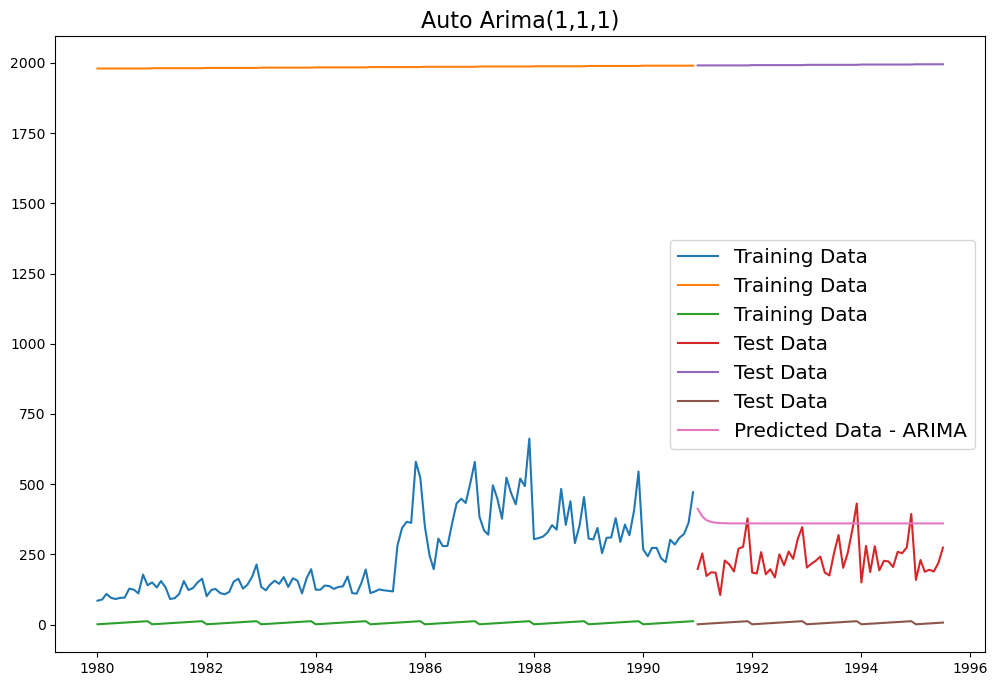

In [300]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Auto Arima(1,1,1)')
plt.grid();

### AUTO SARIMA

In [301]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [302]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [303]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe-Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.366326737317
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347142
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3653.612247111457
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.397051054789
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.5867978686522
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.084399500841
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3244.185598007808
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421277
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010822
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:5624.464784391723
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1071.7371393677752
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1073.5912665501728
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1074.3858105934119
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:6417.489062367013
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738159
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.386120638767
SARIMA(0, 1, 1)x(0,

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3837.5013293641955
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1168.6663425966751
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1168.5208706163855
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1167.6766923067362
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:5009.749770960963
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1045.5602424877895
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1046.7173396256478
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1046.2045150036183
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3548.3036184784874
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1464.190279332936
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1308.2038016216293
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1176.47642407174
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:2755.774073153026
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1293.3977262883286
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1279.666110429105
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1158.4910016244532
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3337.5006363211146
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1169.9627314264121
SARIMA(2, 1, 2)x

In [304]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
127,"(1, 1, 3)","(3, 0, 3, 12)",22.000000
175,"(2, 1, 2)","(3, 0, 3, 12)",22.000000
255,"(3, 1, 3)","(3, 0, 3, 12)",26.000000
95,"(1, 1, 1)","(3, 0, 3, 12)",178.474175
223,"(3, 1, 1)","(3, 0, 3, 12)",919.130513


In [305]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe-Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -507.955
Date:                                 Thu, 30 Nov 2023   AIC                           1035.910
Time:                                         20:32:53   BIC                           1061.128
Sample:                                              0   HQIC                          1046.088
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3379      0.253      1.336      0.182      -0.158       0

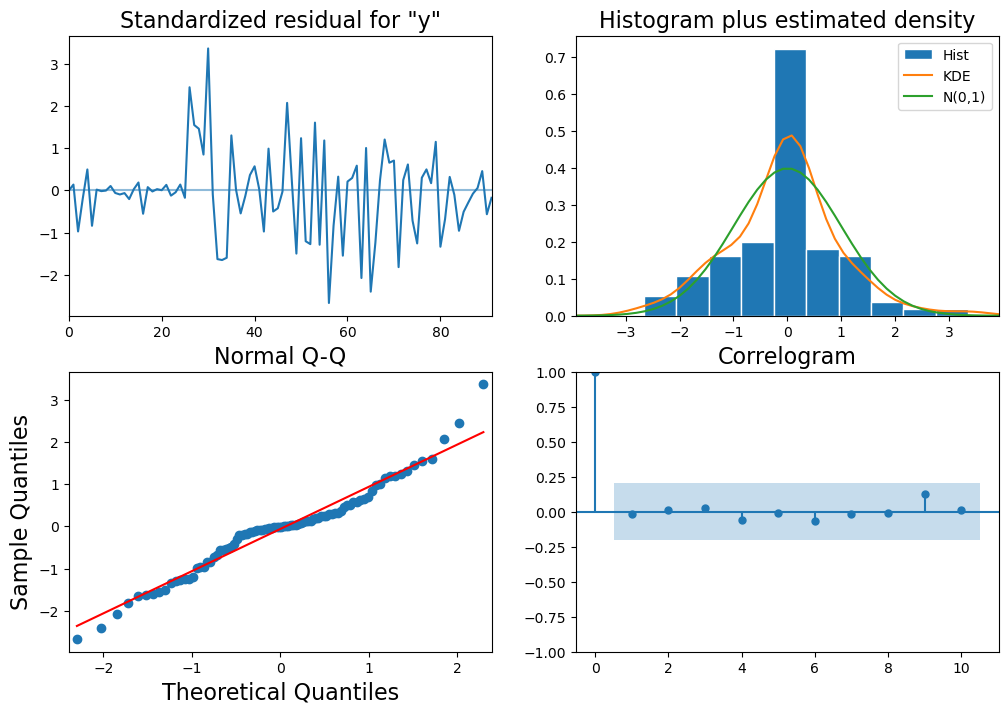

In [306]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [307]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,226.703195,57.102972,114.783427,338.622964
1,204.643213,66.557979,74.191971,335.094456
2,219.164348,77.704708,66.865919,371.462777
3,246.818428,83.337918,83.479111,410.157745
4,230.085809,88.862735,55.918049,404.253568


In [308]:
rmse = mean_squared_error(test['Shoe-Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

90.40430459490653


In [309]:
resultsDf_9_1 = pd.DataFrame({'RMSE': rmse}
                           ,index=['(1,1,3),(3,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,RMSE
"Alpha=0.605,SES",196.404836
"Alpha=0.594,Beta=0.00027,DES",266.161208
"Alpha=0.5707,Beta=0.0001,Gamma=0.2937,TES(additive error)",128.992526
"Alpha=0.5711,Beta=0.00014,Gamma=0.2029:TES(multiplicative error)",83.734048
RegressionOnTime,266.276472
Naive Model,245.121306
SimpleAverageModel,63.984570
"Best MA Model : AR(1,0,0)",92.140047
"Best ARMA Model : ARMA(1,0,2)",100.861370
Auto ARIMA,142.820730


## 1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [310]:
date = pd.date_range(start='8/1/1994', end='7/1/1995', freq='MS')
date

DatetimeIndex(['1994-08-01', '1994-09-01', '1994-10-01', '1994-11-01',
               '1994-12-01', '1995-01-01', '1995-02-01', '1995-03-01',
               '1995-04-01', '1995-05-01', '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [311]:
future_predictions=pd.DataFrame(columns=['Shoe-Sales'],index=date)

In [312]:
future_predictions.head()

,Shoe-Sales
1994-08-01,NaN
1994-09-01,NaN
1994-10-01,NaN
1994-11-01,NaN
1994-12-01,NaN


In [313]:
SimpleAverage_train = df1.copy


In [314]:
future_predictions['mean_forecast'] = train['Shoe-Sales'].mean()
future_predictions.head(12)

,Shoe-Sales,mean_forecast
1994-08-01,NaN,250.575758
1994-09-01,NaN,250.575758
1994-10-01,NaN,250.575758
1994-11-01,NaN,250.575758
1994-12-01,NaN,250.575758
1995-01-01,NaN,250.575758
1995-02-01,NaN,250.575758
1995-03-01,NaN,250.575758
1995-04-01,NaN,250.575758
1995-05-01,NaN,250.575758


## Recommendations

When the sales is lower then it is off season and When the sales is higher then it is season

Discount should be added in the off season to increase the sales.

More and more new models should be introduced during the season of sales.